In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv',index_col='id')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [86]:
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [87]:
test.shape, train.shape

((1000, 20), (2000, 21))

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_screen 

In [90]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [91]:
test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


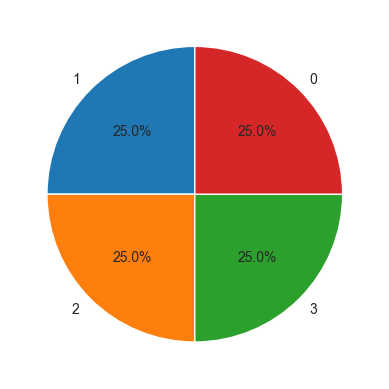

In [92]:
train.loc[train['px_height'] == 0,'px_height'] = np.nan
train.loc[train['sc_w'] == 0,'sc_w'] = np.nan

test.loc[test['px_height'] == 0,'px_height'] = np.nan
test.loc[test['sc_w'] == 0,'sc_w'] = np.nan


value_counts = train['price_range'].value_counts()
plt.pie(value_counts.values, labels = value_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

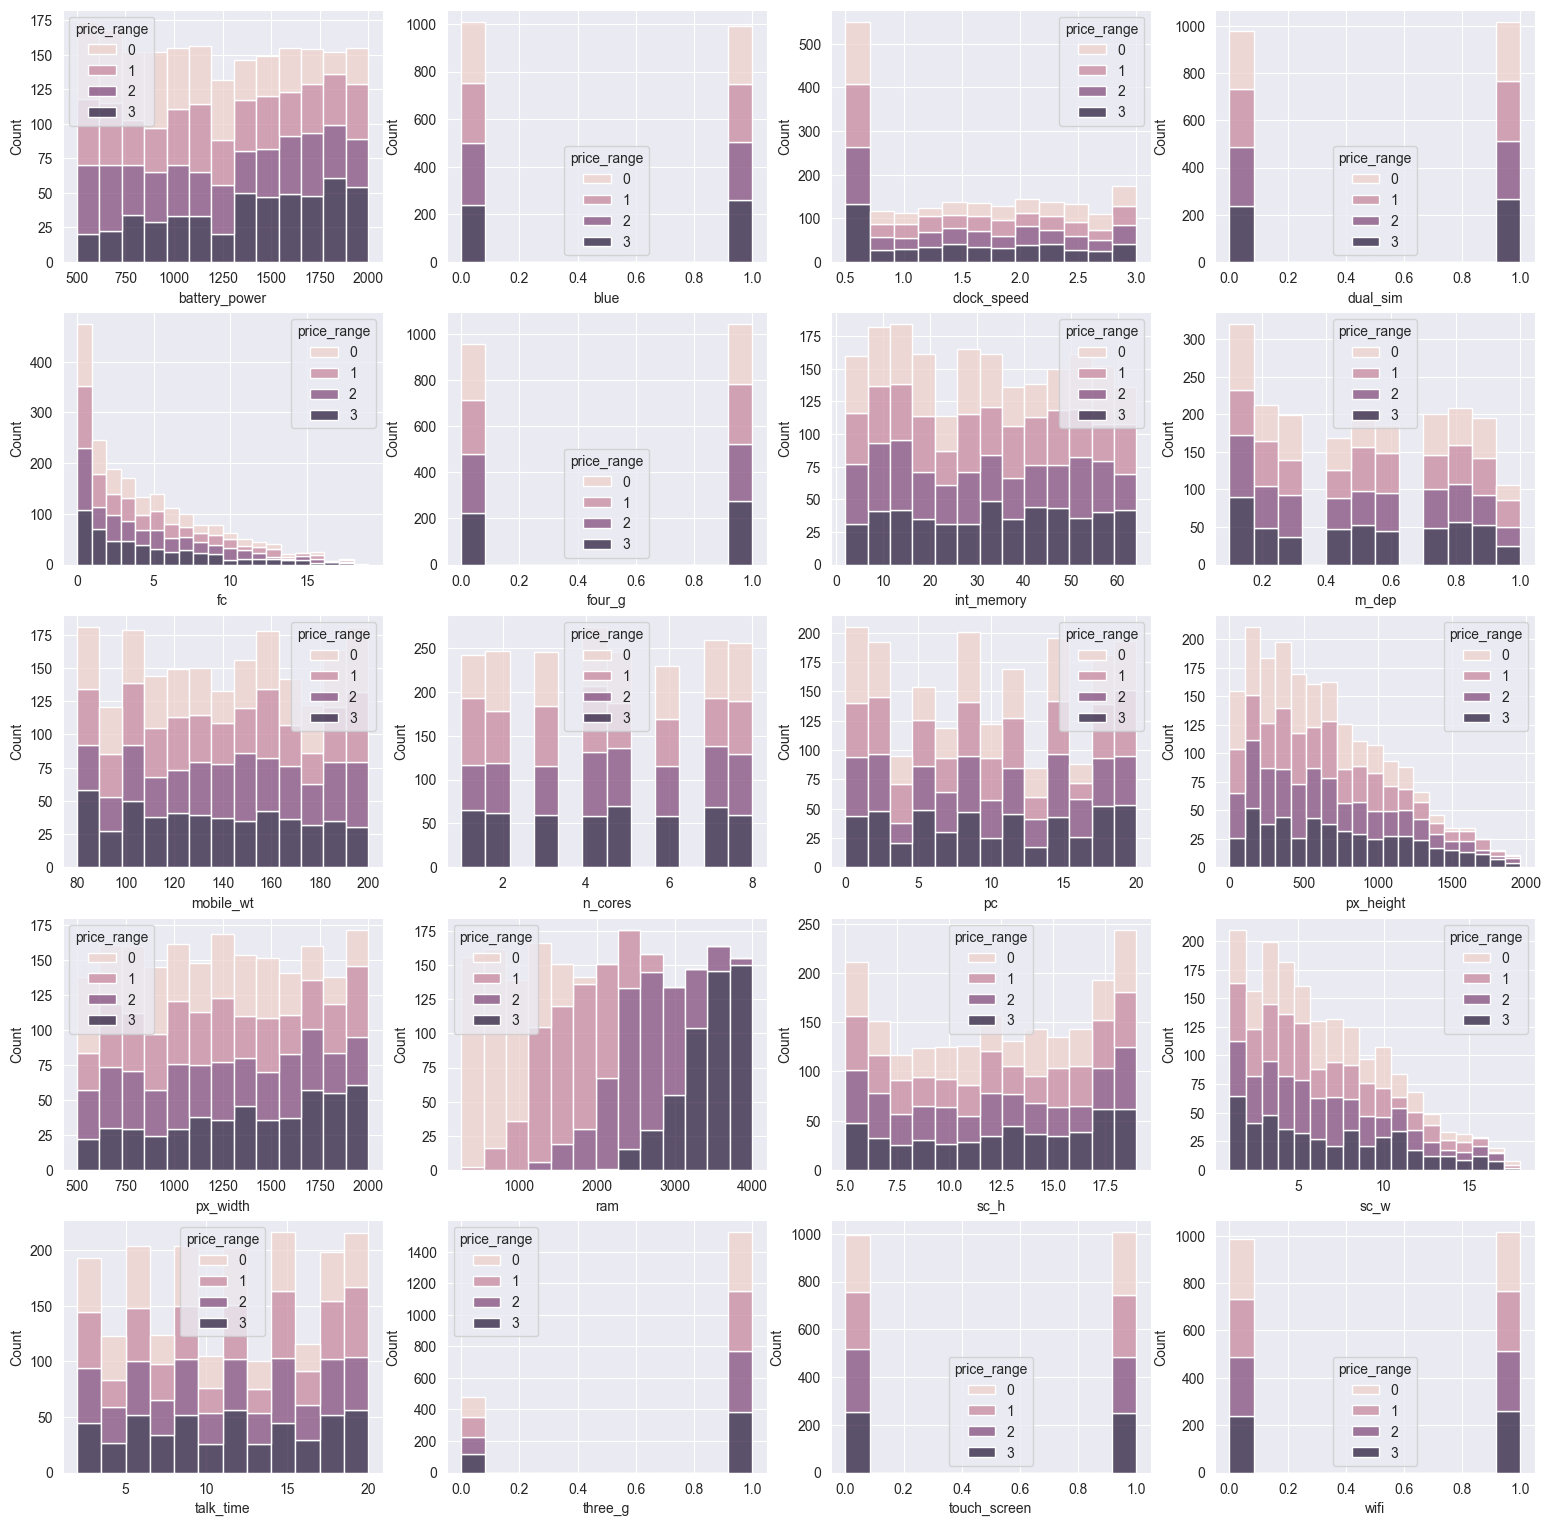

In [93]:
fig, ax = plt.subplots(5, 4,figsize=(19,19))
for i, col in enumerate(train.iloc[:,:-1]):
    sns.histplot(x=col, hue = 'price_range', data=train,ax =ax[i//4][i%4], multiple = 'stack')

<Axes: >

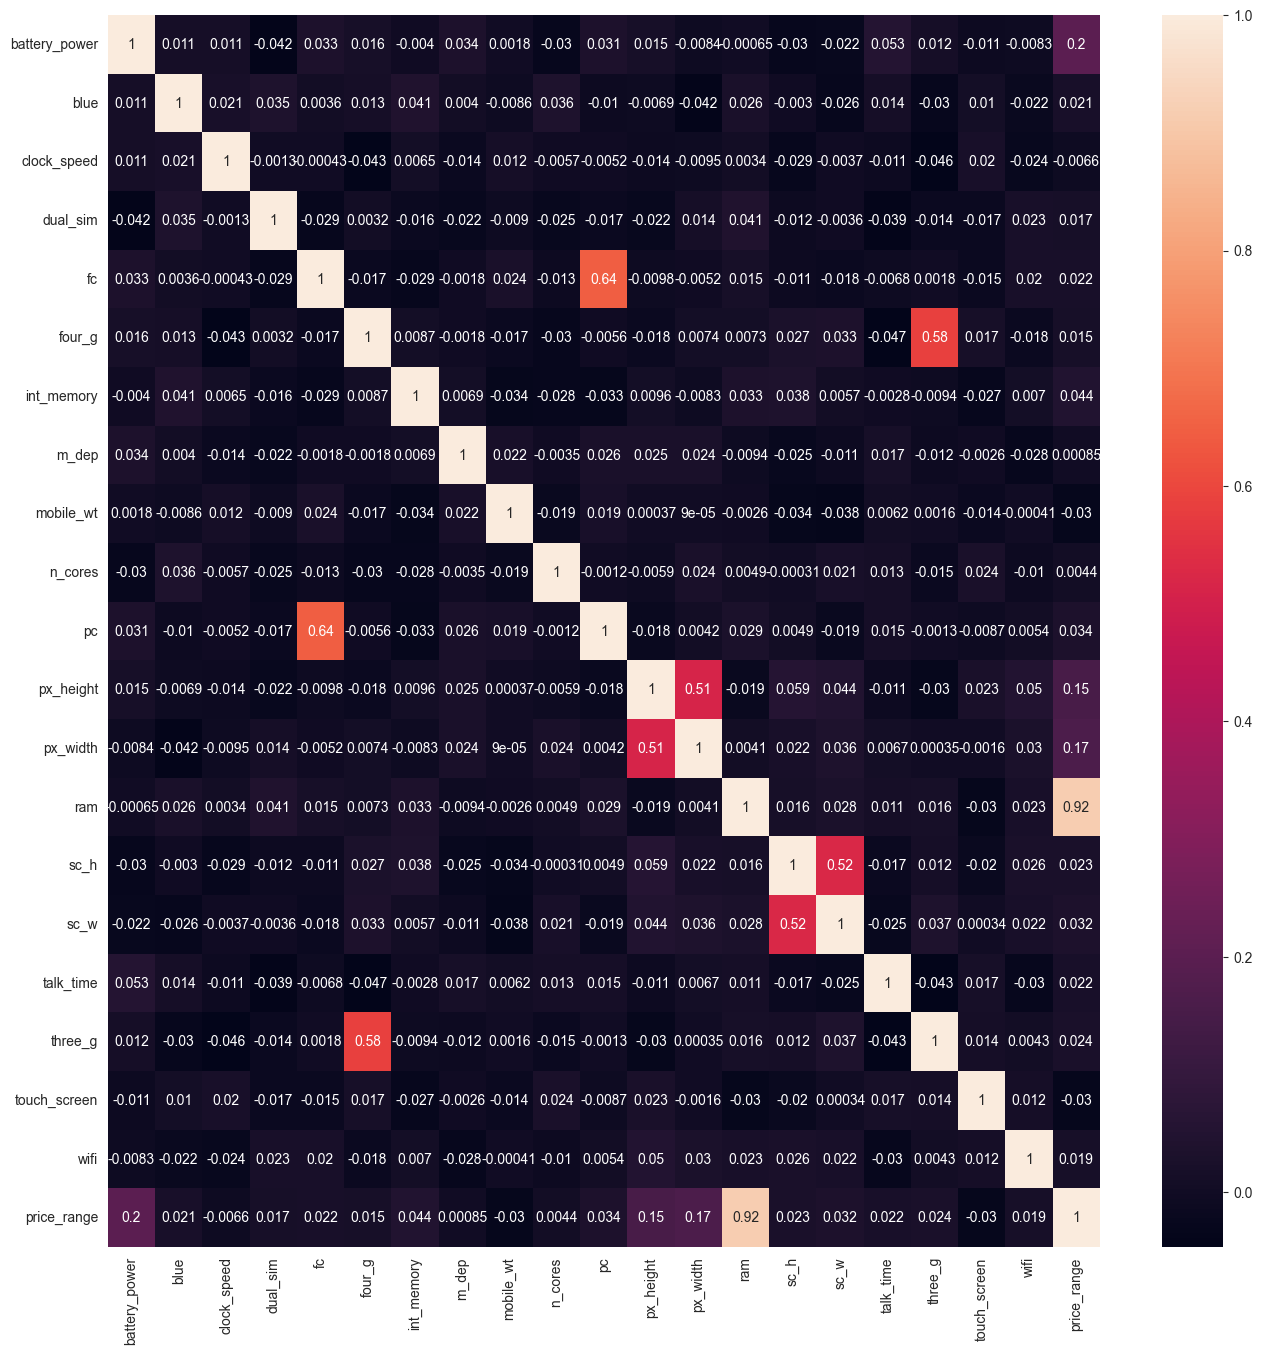

In [94]:
plt.figure(figsize=(16,16))
mat = train.corr()
sns.heatmap(mat, annot=True)

In [95]:
train['px_height'].fillna(train['px_height'].median(), inplace=True)
test['px_height'].fillna(test['px_height'].median(), inplace=True)

train['sc_w'].fillna(train['sc_w'].median(), inplace=True)
test['sc_w'].fillna(test['sc_w'].median(), inplace=True)

In [96]:
main_cols = ['battery_power', 'px_height', 'px_width', 'ram']
train_main = train[main_cols+['price_range']]
test_main = test[main_cols]

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [98]:
X_full = train.drop(['price_range'], axis = 1)
y_full = train['price_range']

In [99]:
cat_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
num_cols =  list(X_full.drop(cat_cols, axis = 1).columns)


scaler = StandardScaler()
X_full[num_cols] = scaler.fit_transform(X_full[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, stratify=y_full, random_state=42, test_size=0.2)

In [101]:
models = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(), KNeighborsClassifier()]
scores = []
model_names = []
for model in models:
    scores.append(np.mean(cross_val_score(model, X_train, y_train, n_jobs=-1)))
    model_names.append(model.__class__.__name__)

scores

[0.9481250000000001, 0.85625, 0.82, 0.568125]

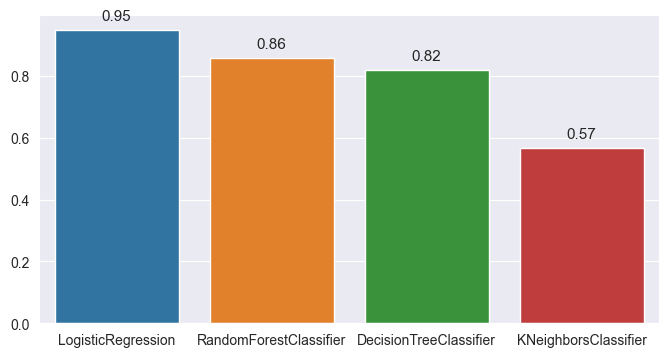

In [102]:
plt.figure(figsize=(8,4))
g=sns.barplot(x=model_names, y=scores)
ax=g
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11,  xytext=(0, 10),
                 textcoords='offset points')

In [103]:
params = [{ 'solver':['newton-cg', 'lbfgs', 'liblinear'],
           'penalty':['none', 'l1', 'l2', 'elasticnet'],
              'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}]
log_reg_cv = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=params, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [104]:
best_score_log_reg = log_reg_cv.best_score_
best_params_log_reg = log_reg_cv.best_params_
print("Best score: ", best_score_log_reg)
print("Best params: ", best_params_log_reg)

Best score:  0.9625
Best params:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [105]:
log_reg_model = log_reg_cv.best_estimator_
log_reg_model.score(X_val, y_val)

0.98

<Axes: >

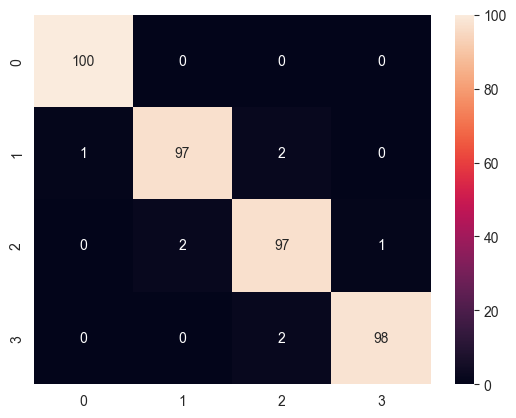

In [106]:
y_pred = log_reg_model.predict(X_val)
mat = confusion_matrix(y_val, y_pred)
sns.heatmap(mat, annot=True,fmt='1')

In [107]:
test_pred = log_reg_model.predict(test)

In [108]:
submission = pd.DataFrame({'id':test.index,
                          'class':test_pred})
submission.to_csv('test_predicted.csv', index=False)